In [1]:
# imports 
import pandas as pd
import numpy as np
from Survival_prob_Class import survival_prob
import matplotlib.pyplot as plt

In [2]:
# initialize simulation 
surv_prob = survival_prob()

In [28]:
# read the simulation datasets 
sim_05_1 = pd.read_csv('Data/simulation_half_1st.csv')
sim_05_2 = pd.read_csv('Data/simulation_half_2nd.csv')
sim_05_3 = pd.read_csv('Data/simulation_half_3rd.csv')
sim_1_1 = pd.read_csv('Data/simulation_one_1st.csv')
sim_1_2 = pd.read_csv('Data/simulation_one_2nd.csv')
sim_1_3 = pd.read_csv('Data/simulation_one_3rd.csv')
real_vector = pd.read_csv('Data/interventions.csv')

In [29]:
# concatenate the three simulation datasets per percentage 
# 0.5%
sim_05 = pd.concat([sim_05_1, sim_05_2, sim_05_3])
# reset index 
sim_05 = sim_05.reset_index(drop=True)
# 1% 
sim_1 = pd.concat([sim_1_1, sim_1_2, sim_1_3])
# reset index 
sim_1 = sim_1.reset_index(drop=True)

In [30]:
# remove unecessary columns, only need duration_Responder, duration_AED and duration_Vector 
# columns to drop
columns_to_drop = ['Patient_loc', 'Responder_lon', 'Responder_lat', 'AED_lon', 'AED_lat', 'Vector_lon', 'Vector_lat']  
sim_05.drop(columns=columns_to_drop, inplace=True)
sim_1.drop(columns=columns_to_drop, inplace=True)

In [31]:
real_vector

,T1,T3,Latitude intervention,Longitude intervention,Response Time
0,2022-06-07 07:02:17,2022-06-07 07:11:24,50.861866,4.708210,547.0
1,2022-06-08 13:26:34,2022-06-08 13:35:03,50.873174,4.716699,509.0
2,2022-06-08 14:35:19,2022-06-08 14:47:58,50.928140,4.703247,759.0
3,2022-06-09 09:51:23,2022-06-09 10:03:05,50.874550,4.730246,702.0
4,2022-06-13 12:35:22,2022-06-13 12:44:12,50.879098,4.696672,530.0
...,...,...,...,...,...
76,2023-04-27 09:45:18,2023-04-27 09:54:43,50.856571,4.653801,565.0
77,2023-05-02 18:36:37,2023-05-02 18:45:01,50.858510,4.693520,504.0
78,2023-05-03 17:38:46,2023-05-03 17:46:05,50.861650,4.681370,439.0
79,2023-05-13 11:26:53,2023-05-13 11:50:12,50.885531,4.684591,1399.0


In [32]:
#add the real vector times to the dataframes 
sim_05['real_duration_Vector'] = real_vector['Response Time']
sim_1['real_duration_Vector'] = real_vector['Response Time']

In [33]:
# calculate time for the slowest vector 
np.max(sim_1['duration_Vector'])
np.max(sim_1['real_duration_Vector'])

2010.0

In [34]:
# in some cases the AED never arrives (it is too far away), need to put this to a value for Survival_prob_Class.py
# choose a very large value (10 000) then we know that the vector always will be faster, slowest vector 703.8 s 

# find instances where duration_AED is 'No AED' and replace them with 10000
sim_05['duration_AED'] = sim_05['duration_AED'].replace('No AED', float(10000))
sim_1['duration_AED'] = sim_1['duration_AED'].replace('No AED', float(10000))


In [35]:
# in the case we don't have a responder, too far away from the patient
# put time of patient to something very large -> same probability of survival with and without fcr, what we would have with only vector

# find instances where duration_Respinder is 'No responder' and replace them with 10000
sim_05['duration_Responder'] = sim_05['duration_Responder'].replace('No responder', float(10000))
sim_1['duration_Responder'] = sim_1['duration_Responder'].replace('No responder', float(10000))

In [36]:
# estimate probability of survival

# save probabilites in df
df_prob_05 = pd.DataFrame(columns=['prob_resp', 'prob_vec'])
df_prob_1 = pd.DataFrame(columns=['prob_resp', 'prob_vec'])

# loop through df 0.5, use simulated vector times 
for index, row in sim_05.iterrows():
    prob_resp, prob_vec = surv_prob.probability_survival(float(row['duration_Responder']), float(row['duration_AED']), row['duration_Vector'])
    # add calcualted probabilities to df 
    df_prob_05.loc[index] = {'prob_resp': prob_resp, 'prob_vec': prob_vec}

# loop through df 1, use real vector times 
for index, row in sim_1.iterrows():
    prob_resp, prob_vec = surv_prob.probability_survival(float(row['duration_Responder']), float(row['duration_AED']), row['real_duration_Vector'])
    # add calcualted probabilities to df 
    df_prob_1.loc[index] = {'prob_resp': prob_resp, 'prob_vec': prob_vec}

### Plot the suvival probabilities

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Survival Probability')

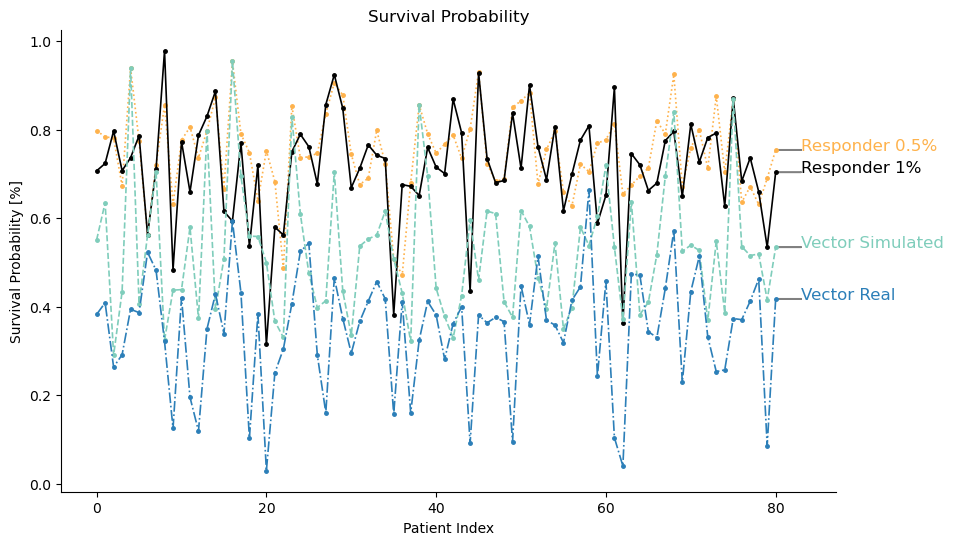

In [51]:
import matplotlib.pyplot as plt

# OurWorldInData color palette
COLOR_SCALE = [
    "#feb24c", "#000000", "#7fcdbb", "#2c7fb8"
]

LINE_STYLE = [":","-","--","-."]
# Define margin around annotation
PAD = 3
y_offset = 0.01  # Adjust based on your data range

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))
# Hide default legend
ax.legend().remove()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Data series
df_list = [df_prob_05, df_prob_1, df_prob_05, df_prob_1]
columns = ["prob_resp", "prob_resp", "prob_vec", "prob_vec"]
labels = ["Responder 0.5%", "Responder 1%", "Vector Simulated", "Vector Real"]

# Plot each series
for idx, (df, column, label) in enumerate(zip(df_list, columns, labels)):
    color = COLOR_SCALE[idx]
    linestyle = LINE_STYLE[idx]
    
    # Plot line with markers
    ax.plot(df.index, df[column],linestyle=linestyle, color=color, marker="o", markersize=2.5, lw=1.2, label=label)

    # Add annotation
    y_end_value = df[column].iloc[-1]
    ax.text(
        df.index[-1] + PAD, y_end_value + y_offset, label,
        color=color, fontsize=12, va="center"
    )

    # Add arrow from line to annotation
    ax.arrow(
        df.index[-1], y_end_value,
        PAD, 0, clip_on=False, color="gray"
    )

# Labels and title
ax.set_xlabel("Patient Index")
ax.set_ylabel("Survival Probability [%]")
ax.set_title("Survival Probability")



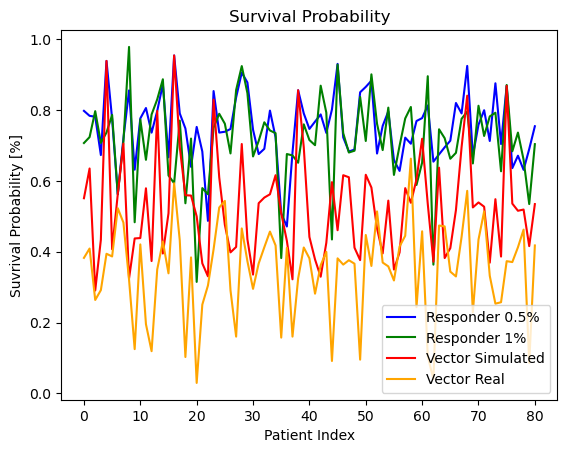

In [52]:
# plot the survival probability of fcr and vector for different percentages 
# plt.figure(figsize=(10, 6))
plt.plot(df_prob_05.index, df_prob_05['prob_resp'], label='Responder 0.5%', c='blue')
plt.plot(df_prob_1.index, df_prob_1['prob_resp'], label='Responder 1%', c='green')
plt.plot(df_prob_05.index, df_prob_05['prob_vec'], label='Vector Simulated', c='red')
plt.plot(df_prob_1.index, df_prob_1['prob_vec'], label='Vector Real', c='orange')

plt.xlabel('Patient Index')
plt.ylabel('Suvrival Probability [%]')
plt.title('Survival Probability')
plt.legend()
plt.show()

In [13]:
# calculate the mean survival probability 
print('Mean survival probability FCR 0.5%:')
print(np.mean(df_prob_05['prob_resp']))
print('Mean survival probability FCR 1.0%:')
print(np.mean(df_prob_1['prob_resp']))
print('Mean survival probability vector simulated:')
print(np.mean(df_prob_05['prob_vec']))
print('Mean survival probability vector real:')
print(np.mean(df_prob_1['prob_vec']))

Mean survival probability FCR 0.5%:
0.749377634347836
Mean survival probability FCR 1.0%:
0.7138813574017974
Mean survival probability vector simulated:
0.5277901935644382
Mean survival probability vector real:
0.3496460336047981
